In [1]:
# import everything

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load the data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# [60000, 28, 28], [10000, 28, 28], [60000, ], [10000, ]

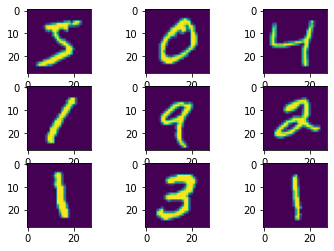

In [3]:
# plot the figures to be sure the dataset is loading correctly

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.savefig("should_be_digits_please")

In [4]:
img = np.array(x_train[0])
print(img.shape)

(28, 28)


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8445277796339333985
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4406378496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13473690297582400251
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [6]:
# define model

dim = [(28 * 28,), 512, 512, 10]
#input, first layer, second layer,output

def makeModel(dim):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=dim[0]))
    model.add(keras.layers.Dense(dim[1], activation="relu"))
    model.add(keras.layers.Dense(dim[2], activation="relu"))
    model.add(keras.layers.Dense(dim[3], activation="softmax"))
    return model

model = makeModel(dim)
print(model.output_shape) # should be 10

(None, 10)


In [7]:
# compiling

optimizerMethod = "adam"
lossFunction = "categorical_crossentropy"
metricsLst = ["accuracy"]
model.compile(optimizer=optimizerMethod, loss=lossFunction, metrics=metricsLst)

In [8]:
# clean and organize the data
x_train = x_train.reshape(60000, 28 * 28)/255
x_test = x_test.reshape(10000, 28 * 28)/255

nClass = 10
y_train = keras.utils.to_categorical(y_train, nClass)
y_test = keras.utils.to_categorical(y_test, nClass)

In [9]:
# train the model

model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
469/469 - 1s - loss: 0.2183 - accuracy: 0.9342 - val_loss: 0.1186 - val_accuracy: 0.9629
Epoch 2/20
469/469 - 1s - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0730 - val_accuracy: 0.9767
Epoch 3/20
469/469 - 1s - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 4/20
469/469 - 1s - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0861 - val_accuracy: 0.9750
Epoch 5/20
469/469 - 1s - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0632 - val_accuracy: 0.9815
Epoch 6/20
469/469 - 1s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0830 - val_accuracy: 0.9773
Epoch 7/20
469/469 - 1s - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.1071 - val_accuracy: 0.9730
Epoch 8/20
469/469 - 1s - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0832 - val_accuracy: 0.9795
Epoch 9/20
469/469 - 1s - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.1055 - val_accuracy: 0.9756
Epoch 10/20
469/469 - 1s - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.0863 - val_accuracy: 0.9792

In [10]:
# evaluate

results = model.evaluate(x_test, y_test, verbose=2)
print("Loss: ", results[0])
print("Accuracy: ", results[1])

313/313 - 0s - loss: 0.0942 - accuracy: 0.9839
Loss:  0.09416980296373367
Accuracy:  0.9839000105857849


In [11]:
# save the model
# model = tf.keras.applications.mobilenet.MobileNet(input_shape=(1, 28 * 28, 3), weights=None)
model.save('handwritten_model')

INFO:tensorflow:Assets written to: handwritten_model/assets


In [12]:
# delete current model to try loading it in
# del model
model = keras.models.load_model('handwritten_model', compile=True)
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='flatten_input'), name='flatten_input', description="created by layer 'flatten_input'")


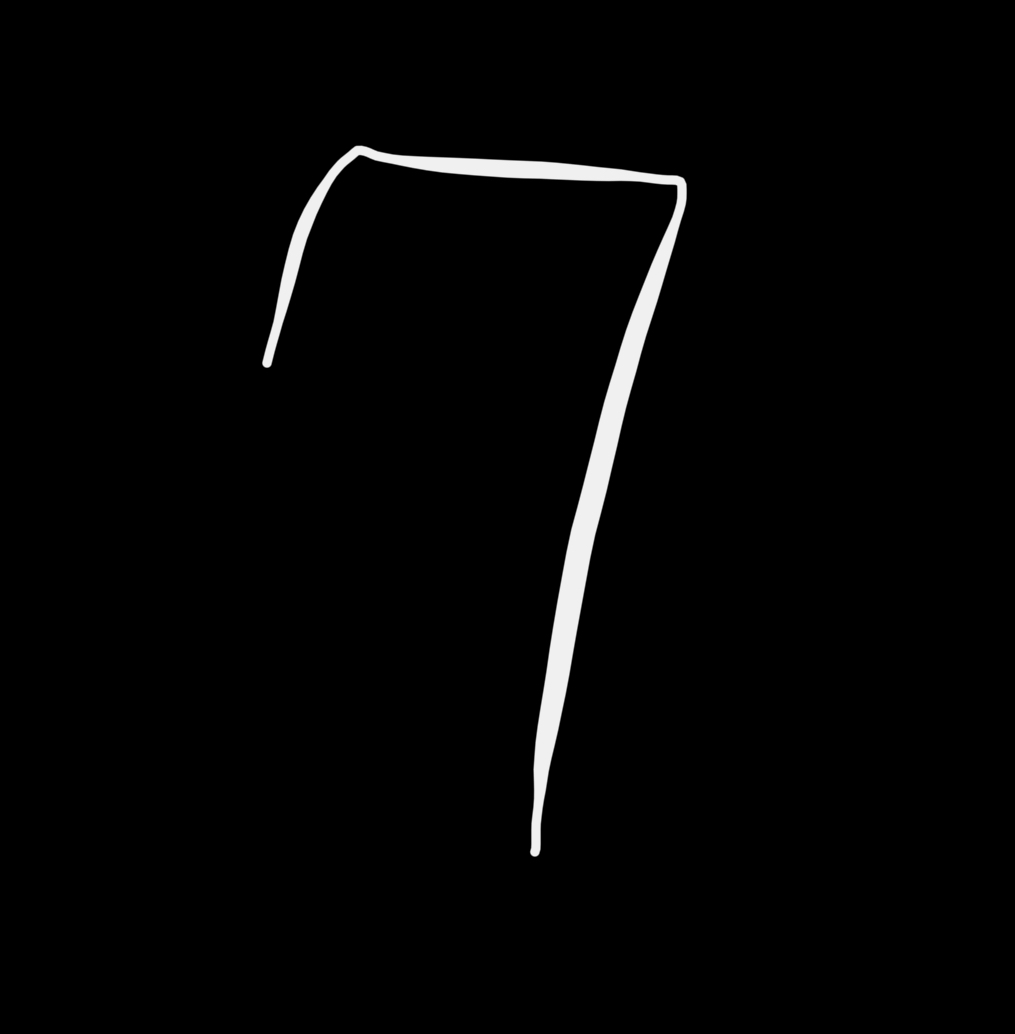

(1015, 1034)


In [26]:
# load in test image and resize
import PIL

sample = PIL.Image.open("7.jpg")
dim = (28, 28)
sample.show()
print(sample.size)
sample = sample.resize(dim)
sample.show()

(28, 28)
float32


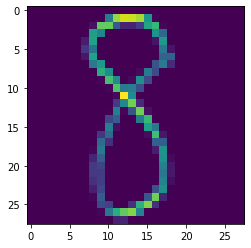

In [24]:
# process image
predict_sample = np.array(sample)
predict_sample = predict_sample[:, :, 0]
print(predict_sample.shape)
plt.imshow(predict_sample)
predict_sample = predict_sample.reshape(1, 28 * 28)/255
predict_sample = predict_sample.astype("float32")
print(predict_sample.dtype)

In [25]:
# predict
prediction = model.predict(predict_sample)
print(prediction)

classes = np.argmax(prediction, axis = 1)
print(classes)

[[1.3376806e-04 1.1054690e-03 3.5859294e-02 9.4757706e-02 1.5342104e-05
  4.4701472e-02 7.4884988e-04 9.6519254e-03 8.0518550e-01 7.8407247e-03]]
[8]
